

# Project: Investigate a Dataset (MEDICAL APPOINTMENT NO-SHOW)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data-Wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

<a id='intro'></a>
# Introduction
  ## Dataset Description
  
  The medical appointment dataset contains information about 110,527 medical appointments of different patients in different hospitals in Brazil.The dataset was sourced from Kaggle website. Its shows the number of appointments showed up for and the ones missed. It also has 14 variables which tell us about the patient and helps to predict if the patient will show up for the appointment or not. The 14 variables or characterisctics  called data dictionary are:
  
  1. Patient ID: Identification of patient
  2. Appointment ID: Identification of each appointment
  3. Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
  4. Appointment Day: The day of the actual appointment, when they have to visit the doctor.
  5. Scheduled Day: The day someone called or registered the appointment, this is before appointment of course.
  6. Age: How old is the patient.
  7. Neighbourhood: Where the appointment takes place.
  8. Scholarship : True or False.Scholarship indicates whether or not the patient is enrolled in Brazilian welfare program Bolsa Família.
  9. Hypertension: True or False
  10. Diabetes: True or False
  11. Alcoholism: True or False
  12. Handicap: True or False
  13. SMS_received: 1 or more messages sent to the patient.
  14. No-show: True or False.
 
 
 ## RESEARCH QUESTION
 1. What factors or features are important to predict if a patient will show up for their scheduled appointment?
  


In [2]:
# import the necessary libraries to use for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [3]:
# load the dataset
medical= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


# Data Wrangling
        Exploring,cleaning,and trimming of the dataset was done.

## General Properties

   ### Explore the dataset

In [4]:
#show the first five rows in the dataset
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#show the last five rows in the dataset
medical.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
#show the mathematical description of the data
medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is an error with the dataset in the age column. The -1 recorded as the minimum age of a patient is an error because no one can be -1 year old. We have to drop that patient.

In [7]:
#show the information about each column
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#show the number of rows and columns
medical.shape

(110527, 14)

In [9]:
#show the data types of each column
medical.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The data type of the scheduled day and appointment day is object, this needs to be changed to datetime data type. The no show data type will also be changed from object to integer.

In [10]:
#show the sum of missing values in the data
medical.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
#show the number of unique values
medical.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The Patient ID is 62299 while the Appointment ID is 110527. This means some patients had appointment more than once in the dataset.

In [12]:
#show the correlation of the columns with each other
medical.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [13]:
#show the number of duplicated values
medical.duplicated().sum()

0

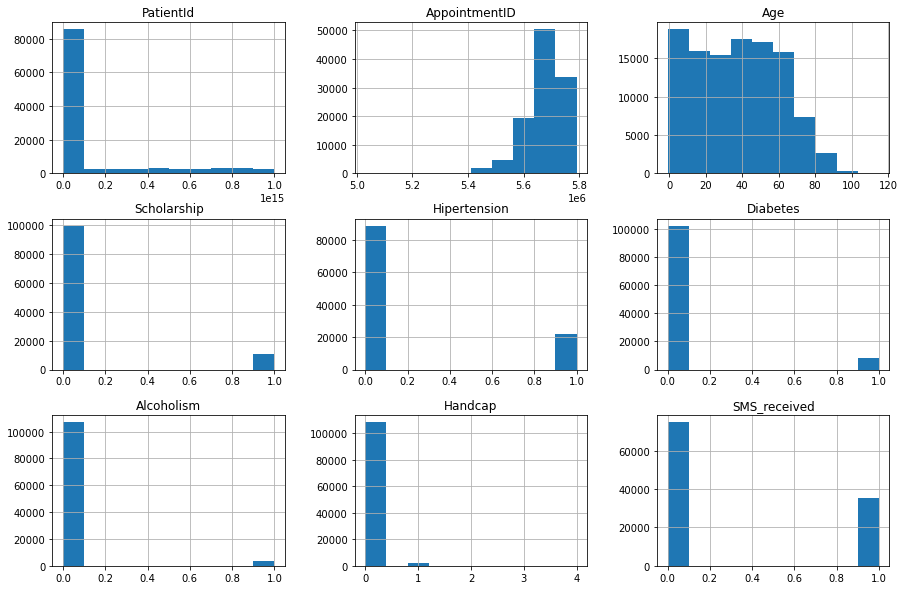

In [14]:
#show the histogram visualization of all the numerical columnss
medical.hist(figsize=(15,10));

The spellings of some column names are wrong, while some were not spaced accordingly. These columns need to be renamed.



### Data Cleaning 
 The data needs to be cleaned to make some corrections to some errors stated earlier so as to make it appropriate for  easy analysis.

In [15]:
#converting dates and time data type to datetime format
from datetime import datetime

medical.ScheduledDay = pd.to_datetime(medical.ScheduledDay)
medical.AppointmentDay = pd.to_datetime(medical.AppointmentDay)

In [16]:
medical.ScheduledDay[0:10]

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
5   2016-04-27 08:36:51+00:00
6   2016-04-27 15:05:12+00:00
7   2016-04-27 15:39:58+00:00
8   2016-04-29 08:02:16+00:00
9   2016-04-27 12:48:25+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

The data type of the date and time has been corrected

In [17]:
#to rename the incorrect columns names to the correct one.
medical.rename({'PatientId' : 'Patient_ID', 'AppointmentID' : 'Appointment_ID','Hipertension':'Hypertension','Handcap': 'Handicap','No-show':'No_show','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day'}, axis=1, inplace=True)
medical.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The columns are now correctly named.

In [18]:
#convert no_show data type  to integer for easy analysis
medical.No_show = np.where(medical.No_show == "Yes", 1, 0)
medical.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


The data type of the no show column has been corrected

In [19]:
#To correct the error in the age column of a patient with -1.
age_error=medical.query('Age < 0')
age_error

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [20]:
#That row with the age error is dropped
medical.drop(99832, axis=0, inplace=True)

In [21]:
age_error=medical.query('Age < 0')
age_error
# Age error fixed

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question  :- What factors or features are important to predict if a patient will show up for their scheduled appointment?

Looking at the relationship between other variables and the No_show variable,we can actually predict if a patient will show up for their appointment or not.
The independent variable,No-show is varied/compared with some dependent variables like Hypertension,Diabetes,Age,SMS-received,etc and the results are visualized to give a clearer comparison and analysis.


In [22]:
medical.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Looking at the relationship between patients with hypertension,diabetes,alcoholism and handicap and showing up for their medical appointments

In [32]:
medical.groupby('Handicap')['No_show'].value_counts()

Handicap  No_show
0         0          86373
          1          21912
1         0           1676
          1            366
2         0            146
          1             37
3         0             10
          1              3
4         0              2
          1              1
Name: No_show, dtype: int64

Some patients have more than one deformities, this will not make the analysis easy. The handicapped patients have to be grouped together. 

In [33]:
#grouping together the number of handicapped patients
medical.Handicap = np.where(medical['Handicap'] >= 1, 1,0)
medical.groupby('Handicap')['No_show'].value_counts()

Handicap  No_show
0         0          86373
          1          21912
1         0           1834
          1            407
Name: No_show, dtype: int64

Hypertension  No_show
0             0          70178
              1          18547
1             0          18029
              1           3772
Name: No_show, dtype: int64


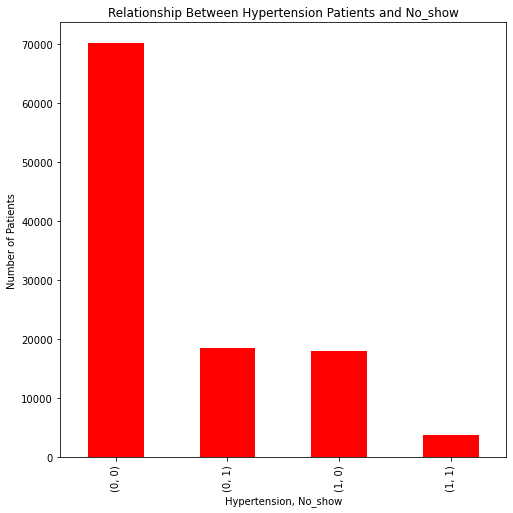

Diabetes  No_show
0         0          81694
          1          20889
1         0           6513
          1           1430
Name: No_show, dtype: int64


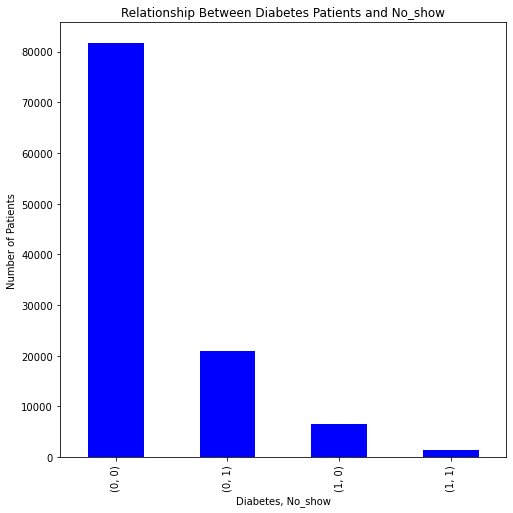

Alcoholism  No_show
0           0          85524
            1          21642
1           0           2683
            1            677
Name: No_show, dtype: int64


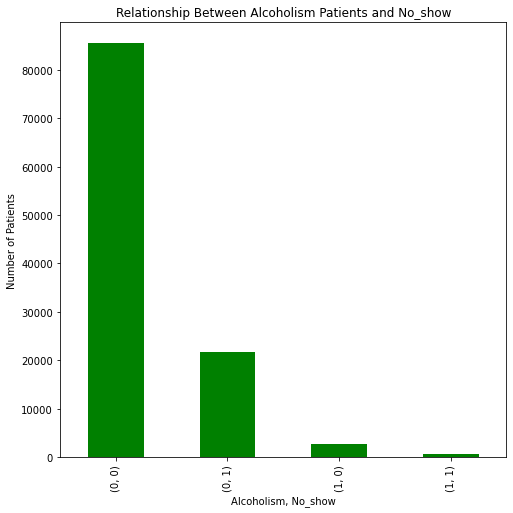

Handicap  No_show
0         0          86373
          1          21912
1         0           1834
          1            407
Name: No_show, dtype: int64


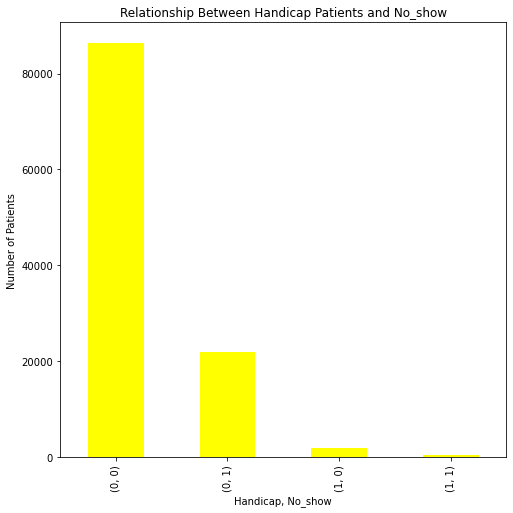

In [34]:
#looking at the relationship between patients with hypertension,diabetes,alcoholism and handicap and showing up for their medical appointments
diseases = {'Hypertension': 'red', 'Diabetes': 'blue', 'Alcoholism': 'green', 'Handicap': 'yellow'}

for disease, color in diseases.items():
    print(medical.groupby(f'{disease}')['No_show'].value_counts())
    i1 = medical.groupby(f'{disease}')['No_show'].value_counts().plot(kind='bar', label=f'{disease}', figsize=(8, 8), color=color)
    plt.title(f'Relationship Between {disease} Patients and No_show')
    plt.xlabel(f'{disease}, No_show')
    plt.ylabel('Number of Patients')
    plt.show()

** The number of appointments showed up for is mostly done by patients without hypertension.The percentage of patients with hypertension that showed up for their appointments is significantly greater than the percentage of hypertension patients that did not show up. Having hypertension makes patients come to the hospital for treatment. Terminal sickness like hypertension can be used to predict if a patient will show up or not for their appointment or not.

** The number of diabetes patients that did not show up for their appointment is low compared to the ones that showed up. Diabetes patients in Brazil that scheduled for appointment are also low in number compared to the number of non-diabetes patients. we can infer that the diabetes patients are serious with their medical appointments. This can be used to predict the showing up of patients.If a patient has diabetes,there is high chances of such patient showing up.

** The number of handicapped patient that did not show up for their appointment is low compared to the number of those that showed up.Nervertheless,the handicapped characteristic of the dataset can not be used to predict the showing up of patients for their appointments.The number of handicapped patient is  very low compared to the total number of patient in Brazil at that period.

** The number of alcoholic patient that did not show up for their appointment is low compared to the number of those that showed up.Nevertheless,the alcoholism characteristic of the dataset can not be used to predict the showing up of patients for their appointments.The number of alcoholic patient is very low compared to the total number of patient in Brazil at that period.

Looking at the relationship between patients that received SMS notification,on the welfare program(scholarship) and patients' gender showing up

In [27]:
#grouping the age into age categories and inserting it into the dataset
ages = [0, 14, 24, 64, 115]
groups = ['Children','Youth','Adult','Senior']
age_group = pd.cut(medical['Age'], ages, labels=groups)
medical.insert(6, 'Age_group', age_group)
age_group
medical.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Age_group,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,Adult,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,Adult,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,Adult,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,Children,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,Adult,JARDIM DA PENHA,0,1,1,0,0,0,0


In [29]:
# Creating a function that takes a datetime (dt) and extracts the weekday_name property
day_from_datetime = lambda dt: dt.strftime('%A')

In [36]:
# Apply the function to the Appointment_Day column
medical['Day_of_week'] = medical.Appointment_Day.apply(day_from_datetime)
print(medical.Day_of_week.value_counts().to_frame(name='Number of Appointments'))


           Number of Appointments
Wednesday                   25867
Tuesday                     25640
Monday                      22714
Friday                      19019
Thursday                    17247
Saturday                       39


Wednesday have the highest number of scheduled appointments while Saturday have the least. No appointment was recorded for Sunday.

Gender  No_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


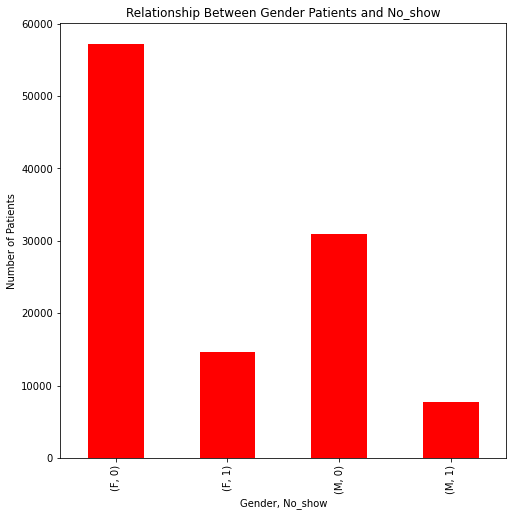

Scholarship  No_show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: No_show, dtype: int64


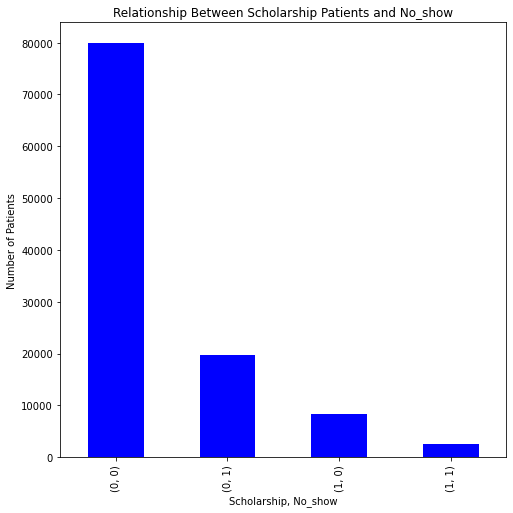

SMS_received  No_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64


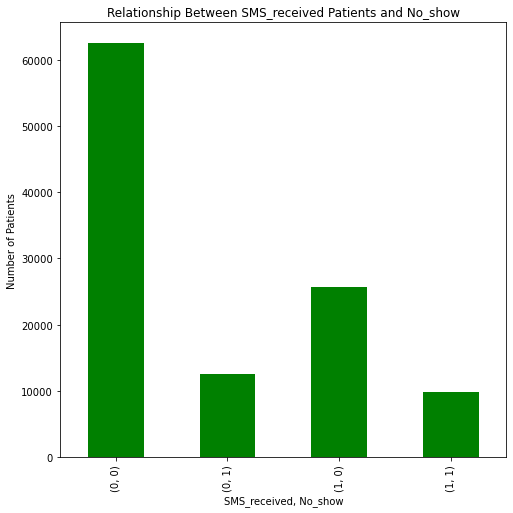

Age_group  No_show
Children   0          15431
           1           4287
Youth      0          10470
           1           3540
Adult      0          47237
           1          11620
Senior     0          12169
           1           2233
Name: No_show, dtype: int64


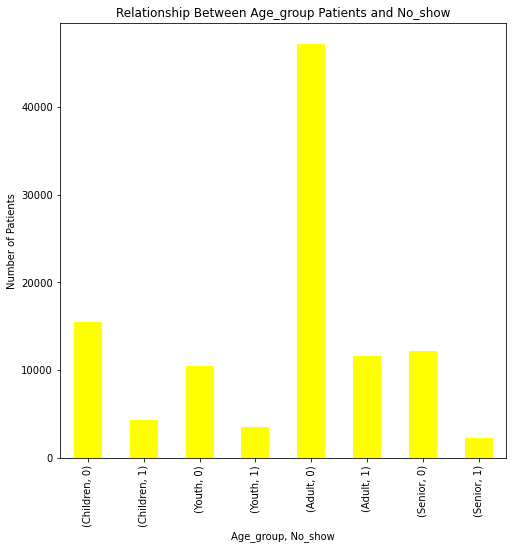

Day_of_week  No_show
Friday       0          14982
             1           4037
Monday       0          18024
             1           4690
Saturday     0             30
             1              9
Thursday     0          13909
             1           3338
Tuesday      0          20488
             1           5152
Wednesday    0          20774
             1           5093
Name: No_show, dtype: int64


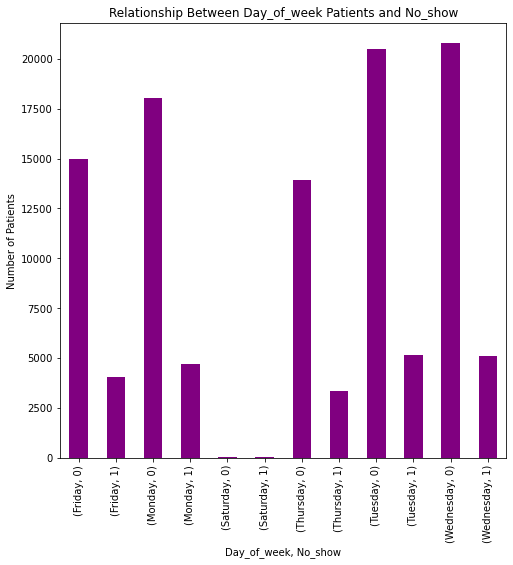

In [35]:
#looking at the relationship between patients that received SMS notification,on the welfare program(scholarship) and patients' gender showing up

characteristics = {'Gender': 'red', 'Scholarship': 'blue', 'SMS_received': 'green','Age_group':'yellow','Day_of_week':'purple'}

for features, color in characteristics.items():
    print(medical.groupby(f'{features}')['No_show'].value_counts())
    i1 = medical.groupby(f'{features}')['No_show'].value_counts().plot(kind='bar', label=f'{features}', figsize=(8, 8), color=color)
    plt.title(f'Relationship Between {features} Patients and No_show')
    plt.xlabel(f'{features}, No_show')
    plt.ylabel('Number of Patients')
    plt.show()

** The number of female patients is higher than the number of male patients.The percentage of both gender(male and female) that showed up and did not show up is similar to each other.Thus,gender can not be used to predict if a patient will show up or not.

** Being in the scholarship program or not can not be used to predict if the patient will show up for the appointment or not.
Patients on scholarship that did not show up for their appointment amount to only 20 percent of the total number of patients on the scholarship program.Patients not on scholarship that did not show up for their appointment amount to only 20 percent of the total number of patients not on the scholarship program too. Being in the scholarship program or not does not predict their show up, I think other variables play a major factor in the prediction

** The number is  patient that did not receive SMS and did not show up is a little bit in the same range with those that received SMS and did not show up. Thus,SMS-received can not be used  to predict if a patient will show up or not.

** The number of adults that showed up for their medical appointment is more than any age group. We can infer from the bar chart that adults ,children and seniors tend to schedule for hospital appointment more than the youths.The adults and seniors are more concerned about their health than the youths. 
The children are been taken to the hospital by their parents which are hypotetically adults. Some of the parent of the children can also be youths which account for the low turnup of children for their appointments.
Therefore, age is a good factor to predict if a patient will show up for their appointment.

** It can be inferred from the bar chart that patients show up for their appoints more on Wednesday,Tuesday and Monday. The number of scheduled appointments is mid on Thursday and Friday. The number of appontments showed up declines toward the end of the week.
The number of scheduled appointments and appointments showed up is drastically low on Saturday while none was recorded on Sunday,this can be due to different activities that occur on weekends such as people resting,cleaning,observing religious activities or social events.
Therefore the day of the week of the appointment scheduled can be used to predict if a patient will show up for the appointment or not.

In [33]:
#looking at the relationship between neighbourhood and no show
medical.groupby('Neighbourhood')['No_show'].value_counts()

Neighbourhood    No_show
AEROPORTO        0             7
                 1             1
ANDORINHAS       0          1741
                 1           521
ANTÔNIO HONÓRIO  0           221
                            ... 
TABUAZEIRO       1           573
UNIVERSITÁRIO    0           120
                 1            32
VILA RUBIM       0           710
                 1           141
Name: No_show, Length: 160, dtype: int64

With the cumbersome data, neighbourhood can not be used to predict if a patient will show up for his/her medical appointment or not

<a id='conclusions'></a>
## Conclusions



  Most of the patients in Brazil recorded in the dataset are females.The age-group of most patients scheduled for appointments  ranges between adults and seniors.Some areas have more patients than others ,this can be due to the population of citizens in those areas.Some patients have terminal diseases which encouraged the patient to come for treatment ,most especially if its at the critical stage or in combination with other diseases such as hypertension.
 The exploratory analysis confirmed that correlation does not imply causation,example is the case of the relationship between SMS received and number of appointments showed up for which was contrary to what was expected.
 The age of patient,the week day of appointment and the hypertension status of the patient are important factors that can predict if a patient will show up for their appointment or not.
 
 LIMITATIONS: The severity of the terminal disease was not given,having a disease might not be the reason of a patient going to the hospital except in a critical stage.
 Since some patients had appointment more than once,they might receive SMS motification at the second or third appointment if they missed or did not missed their first appointment and this was not captured for each patient properly in the dataset and thus affect the number of no_shows of SMS received in the dataset.